<a href="https://colab.research.google.com/github/berthasimbolon/Studi-Independen/blob/main/makanan_tradisional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import os
for dirname, _, filenames in os.walk('https://raw.githubusercontent.com/berthasimbolon/Studi-Independen/main/Dataset/makanan_tradisional.csv'):
  for filename in filenames:
      print(os.path.join(dirname, filename))

In [ ]:
!wget -O makanan_tradisional.csv https://raw.githubusercontent.com/berthasimbolon/Studi-Independen/main/Dataset/makanan_tradisional.csv

--2021-10-13 17:07:13--  https://raw.githubusercontent.com/berthasimbolon/Studi-Independen/main/Dataset/makanan_tradisional.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15511 (15K) [text/plain]
Saving to: ‘makanan_tradisional.csv’

makanan_tradisional 100%[===================>]  15.15K  --.-KB/s    in 0.001s  

2021-10-13 17:07:14 (27.3 MB/s) - ‘makanan_tradisional.csv’ saved [15511/15511]



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = 'makanan_tradisional.csv'
df = pd.read_csv('makanan_tradisional.csv', encoding = 'unicode_escape')
df

,Timestamp,Type_Makanan,Code_Makanan,Amount_Makanan,Type_Minuman,Code_Minuman,Amount_Minuman,Gender,Payment
0,10:01,Bakso kuah,1,6,Es teh,1,3,1,DANA
1,10:04,Mie ayam bakso,3,12,Es jeruk,2,10,0,DANA
2,10:05,Ayam bakar,4,10,Es teh,1,5,0,LINK AJA
3,10:06,Nasi goreng,2,9,Mineral water,3,9,0,DANA
4,10:07,Soto,6,11,Es jeruk,2,3,1,DANA
...,...,...,...,...,...,...,...,...,...
342,11:08,Bakso kuah,1,4,Es campur,4,1,0,OVO
343,11:10,Ayam goreng,5,2,Es campur,4,3,1,OVO
344,11:11,Bakso kuah,1,10,Es jeruk,2,2,1,GOPAY
345,11:13,Bakso kuah,1,8,Es teh,1,5,0,TUNAI


In [ ]:
df.shape

(347, 9)

In [ ]:
df.head()

,Timestamp,Type_Makanan,Code_Makanan,Amount_Makanan,Type_Minuman,Code_Minuman,Amount_Minuman,Gender,Payment
0,10:01,Bakso kuah,1,6,Es teh,1,3,1,DANA
1,10:04,Mie ayam bakso,3,12,Es jeruk,2,10,0,DANA
2,10:05,Ayam bakar,4,10,Es teh,1,5,0,LINK AJA
3,10:06,Nasi goreng,2,9,Mineral water,3,9,0,DANA
4,10:07,Soto,6,11,Es jeruk,2,3,1,DANA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       347 non-null    object
 1   Type_Makanan    347 non-null    object
 2   Code_Makanan    347 non-null    int64 
 3   Amount_Makanan  347 non-null    int64 
 4   Type_Minuman    347 non-null    object
 5   Code_Minuman    347 non-null    int64 
 6   Amount_Minuman  347 non-null    int64 
 7   Gender          347 non-null    int64 
 8   Payment         347 non-null    object
dtypes: int64(5), object(4)
memory usage: 24.5+ KB


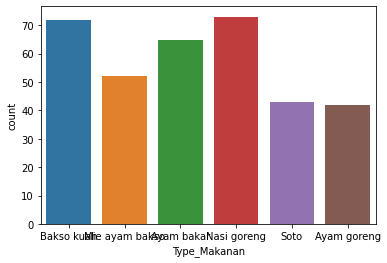

In [ ]:
makanan = df['Type_Makanan']

sns.countplot("Type_Makanan", data=df)
plt.show()

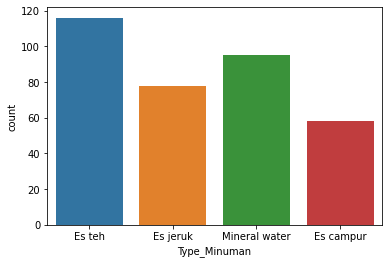

In [ ]:
minuman = df['Type_Minuman']

sns.countplot("Type_Minuman", data=df)
plt.show()

In [ ]:
df.isnull().sum()

Timestamp         0
Type_Makanan      0
Code_Makanan      0
Amount_Makanan    0
Type_Minuman      0
Code_Minuman      0
Amount_Minuman    0
Gender            0
Payment           0
dtype: int64

In [ ]:
df.describe()

,Code_Makanan,Amount_Makanan,Code_Minuman,Amount_Minuman,Gender
count,347.000000,347.000000,347.000000,347.000000,347.000000
mean,3.175793,6.164265,2.273775,4.190202,0.466859
std,1.674595,3.396546,1.097806,2.639981,0.499621
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,3.000000,1.000000,2.500000,0.000000
50%,3.000000,6.000000,2.000000,3.000000,0.000000
75%,4.000000,9.000000,3.000000,5.000000,1.000000
max,6.000000,12.000000,4.000000,10.000000,1.000000


In [ ]:
df['Timestamp'].unique()

array(['10:01', '10:04', '10:05', '10:06', '10:07', '10:08', '10:09',
       '10:11', '10:12', '10:16', '10:17', '10:19', '10:20', '10:24',
       '10:25', '10:26', '10:33', '10:37', '10:38', '10:39', '10:43',
       '10:44', '10:45', '10:48', '10:49', '10:53', '10:54', '10:58',
       '10:59', '11:02', '11:05', '11:07', '11:08', '11:10', '11:14',
       '11:17', '11:19', '11:20', '11:21', '11:22', '11:23', '11:24',
       '11:25', '11:26', '11:27', '11:28', '11:29', '11:30', '11:31',
       '11:32', '11:34', '11:35', '11:37', '11:38', '11:40', '11:42',
       '11:43', '11:44', '11:45', '11:46', '11:47', '11:48', '11:49',
       '11:50', '11:51', '11:52', '11:53', '11:58', '11:59', '12:04',
       '12:05', '12:06', '12:07', '12:08', '12:11', '12:12', '12:15',
       '12:18', '12:20', '12:22', '12:24', '12:30', '12:34', '12:36',
       '12:38', '12:39', '12:40', '12:45', '12:48', '12:50', '12:52',
       '12:54', '12:56', '12:58', '13:00', '13:01', '13:03', '13:05',
       '13:07', '13:

In [ ]:
len(df['Timestamp'].unique())

329

In [ ]:
df.drop(['Timestamp'], axis=1, inplace=True)

In [ ]:
len(df['Type_Makanan'].unique())

6

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type_Makanan    347 non-null    object
 1   Code_Makanan    347 non-null    int64 
 2   Amount_Makanan  347 non-null    int64 
 3   Type_Minuman    347 non-null    object
 4   Code_Minuman    347 non-null    int64 
 5   Amount_Minuman  347 non-null    int64 
 6   Gender          347 non-null    int64 
 7   Payment         347 non-null    object
dtypes: int64(5), object(3)
memory usage: 21.8+ KB


In [ ]:
df.head()

,Type_Makanan,Code_Makanan,Amount_Makanan,Type_Minuman,Code_Minuman,Amount_Minuman,Gender,Payment
0,Bakso kuah,1,6,Es teh,1,3,1,DANA
1,Mie ayam bakso,3,12,Es jeruk,2,10,0,DANA
2,Ayam bakar,4,10,Es teh,1,5,0,LINK AJA
3,Nasi goreng,2,9,Mineral water,3,9,0,DANA
4,Soto,6,11,Es jeruk,2,3,1,DANA


In [ ]:
X = df
y = df['Type_Makanan']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Type_Makanan'] = le.fit_transform(X['Type_Makanan'])
y = le.transform(y)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type_Makanan    347 non-null    int64 
 1   Code_Makanan    347 non-null    int64 
 2   Amount_Makanan  347 non-null    int64 
 3   Type_Minuman    347 non-null    object
 4   Code_Minuman    347 non-null    int64 
 5   Amount_Minuman  347 non-null    int64 
 6   Gender          347 non-null    int64 
 7   Payment         347 non-null    object
dtypes: int64(6), object(2)
memory usage: 21.8+ KB


In [ ]:
X.head()

,Type_Makanan,Code_Makanan,Amount_Makanan,Type_Minuman,Code_Minuman,Amount_Minuman,Gender,Payment
0,2,1,6,Es teh,1,3,1,DANA
1,3,3,12,Es jeruk,2,10,0,DANA
2,0,4,10,Es teh,1,5,0,LINK AJA
3,4,2,9,Mineral water,3,9,0,DANA
4,5,6,11,Es jeruk,2,3,1,DANA


In [ ]:
cols = X.columns

In [ ]:
X = df
y = df['Type_Minuman']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Type_Minuman'] = le.fit_transform(X['Type_Minuman'])
y = le.transform(y)

In [ ]:
X.head()

,Type_Makanan,Code_Makanan,Amount_Makanan,Type_Minuman,Code_Minuman,Amount_Minuman,Gender,Payment
0,2,1,6,2,1,3,1,DANA
1,3,3,12,1,2,10,0,DANA
2,0,4,10,2,1,5,0,LINK AJA
3,4,2,9,3,3,9,0,DANA
4,5,6,11,1,2,3,1,DANA


In [ ]:
X = df
y = df['Payment']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Payment'] = le.fit_transform(X['Payment'])
y = le.transform(y)

In [ ]:
X.head()

,Type_Makanan,Code_Makanan,Amount_Makanan,Type_Minuman,Code_Minuman,Amount_Minuman,Gender,Payment
0,2,1,6,2,1,3,1,0
1,3,3,12,1,2,10,0,0
2,0,4,10,2,1,5,0,2
3,4,2,9,3,3,9,0,0
4,5,6,11,1,2,3,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
X = ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

In [ ]:
X.head()

,Type_Makanan,Code_Makanan,Amount_Makanan,Type_Minuman,Code_Minuman,Amount_Minuman,Gender,Payment
0,0.4,0.0,0.454545,0.666667,0.000000,0.222222,1.0,0.0
1,0.6,0.4,1.000000,0.333333,0.333333,1.000000,0.0,0.0
2,0.0,0.6,0.818182,0.666667,0.000000,0.444444,0.0,0.5
3,0.8,0.2,0.727273,1.000000,0.666667,0.888889,0.0,0.0
4,1.0,1.0,0.909091,0.333333,0.333333,0.222222,1.0,0.0


In [ ]:
df.isnull().sum()

Type_Makanan      0
Code_Makanan      0
Amount_Makanan    0
Type_Minuman      0
Code_Minuman      0
Amount_Minuman    0
Gender            0
Payment           0
dtype: int64

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
model = RandomForestClassifier(random_state=1, verbose=1)
model.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=1,
                       warm_start=False)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_

array([[ 4.43243243e-01,  4.77837838e-01,  4.92383292e-01,
         6.14414414e-01,  4.68468468e-01,  4.45045045e-01,
        -1.38777878e-15,  5.18918919e-01],
       [ 5.41975309e-01,  3.86419753e-01,  4.43322110e-01,
         5.22633745e-01,  3.74485597e-01,  2.51028807e-01,
         1.00000000e+00,  4.83024691e-01]])

In [ ]:
kmeans.inertia_

265.3767726567247

In [ ]:
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 73 out of 347 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.21


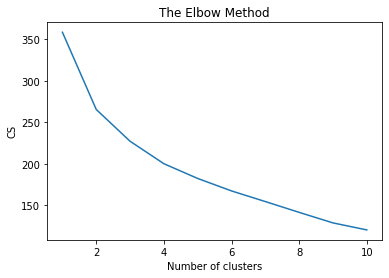

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 91 out of 347 samples were correctly labeled.
Accuracy score: 0.26


In [ ]:
df

,Type_Makanan,Code_Makanan,Amount_Makanan,Type_Minuman,Code_Minuman,Amount_Minuman,Gender,Payment
0,2,1,6,2,1,3,1,0
1,3,3,12,1,2,10,0,0
2,0,4,10,2,1,5,0,2
3,4,2,9,3,3,9,0,0
4,5,6,11,1,2,3,1,0
...,...,...,...,...,...,...,...,...
342,2,1,4,0,4,1,0,3
343,1,5,2,0,4,3,1,3
344,2,1,10,1,2,2,1,1
345,2,1,8,2,1,5,0,4


# Decision Tree

In [ ]:
df.columns

Index(['Type_Makanan', 'Code_Makanan', 'Amount_Makanan', 'Type_Minuman',
       'Code_Minuman', 'Amount_Minuman', 'Gender', 'Payment'],
      dtype='object')

In [ ]:
#split dataset in features and target variable

x = df.iloc[:, :7] # Features
y = df.iloc[:, 6] # Target variable

In [ ]:
print(X, y)

    Type_Makanan Code_Makanan Amount_Makanan  ... Amount_Minuman Gender Payment
0            0.4          0.0       0.454545  ...       0.222222    1.0    0.00
1            0.6          0.4       1.000000  ...       1.000000    0.0    0.00
2            0.0          0.6       0.818182  ...       0.444444    0.0    0.50
3            0.8          0.2       0.727273  ...       0.888889    0.0    0.00
4            1.0          1.0       0.909091  ...       0.222222    1.0    0.00
..           ...          ...            ...  ...            ...    ...     ...
342          0.4          0.0       0.272727  ...       0.000000    0.0    0.75
343          0.2          0.8       0.090909  ...       0.222222    1.0    0.75
344          0.4          0.0       0.818182  ...       0.111111    1.0    0.25
345          0.4          0.0       0.636364  ...       0.444444    0.0    1.00
346          0.2          0.8       0.090909  ...       0.444444    1.0    0.75

[347 rows x 8 columns] 0      1
1      

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        29

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



# Menggambar pohon keputusan

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('makanan_tradisional.csv')

In [ ]:
data.head()

,Timestamp,Type_Makanan,Code_Makanan,Amount_Makanan,Type_Minuman,Code_Minuman,Amount_Minuman,Gender,Payment
0,10:01,Bakso kuah,1,6,Es teh,1,3,1,DANA
1,10:04,Mie ayam bakso,3,12,Es jeruk,2,10,0,DANA
2,10:05,Ayam bakar,4,10,Es teh,1,5,0,LINK AJA
3,10:06,Nasi goreng,2,9,Mineral water,3,9,0,DANA
4,10:07,Soto,6,11,Es jeruk,2,3,1,DANA


In [ ]:
X = df.iloc[:, [2, 5]].values

In [ ]:
X

array([[ 6,  3],
       [12, 10],
       [10,  5],
       [ 9,  9],
       [11,  3],
       [ 8,  4],
       [ 7,  7],
       [ 6,  3],
       [ 5,  2],
       [ 9,  9],
       [11,  3],
       [ 7,  7],
       [11,  3],
       [ 8, 10],
       [ 7,  5],
       [11,  9],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 3,  3],
       [ 9,  9],
       [ 3,  3],
       [ 5,  5],
       [ 5,  5],
       [ 1,  1],
       [ 7,  2],
       [12, 10],
       [ 8,  4],
       [ 7,  7],
       [ 5,  2],
       [ 7,  3],
       [12, 10],
       [10,  5],
       [ 9,  9],
       [ 3,  3],
       [ 3,  3],
       [ 1,  1],
       [ 3,  3],
       [ 9,  9],
       [ 3,  3],
       [ 5,  5],
       [ 5,  5],
       [ 5,  5],
       [ 5,  5],
       [ 1,  1],
       [ 3,  3],
       [ 6,  3],
       [ 6,  3],
       [ 5,  2],
       [ 7,  2],
       [12, 10],
       [10,  5],
       [ 9,  9],
       [11,  3],
       [ 8,  4],
       [ 7,  7],
       [11,  3],
       [ 6,  3],
       [ 5,  2

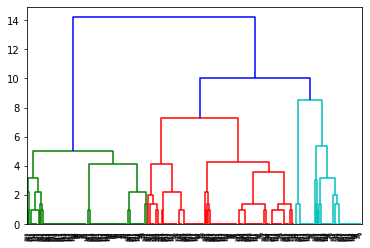

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

In [ ]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
model.fit(X)
labels = model.labels_

In [ ]:
labels

array([2, 3, 4, 0, 4, 2, 0, 2, 1, 0, 4, 0, 4, 0, 2, 3, 1, 1, 1, 1, 0, 1,
       2, 2, 1, 2, 3, 2, 0, 1, 2, 3, 4, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 3, 4, 0, 4, 2, 0, 4, 2, 1, 2, 3, 4, 0, 4, 2, 0,
       4, 4, 4, 4, 0, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 3, 4, 0, 4, 2, 0, 4, 2, 1, 2,
       3, 2, 1, 2, 3, 4, 0, 4, 2, 0, 4, 2, 1, 2, 3, 4, 0, 4, 2, 0, 4, 4,
       4, 4, 0, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 3, 4, 0, 4, 2, 0, 4, 2, 1, 2, 3, 4,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 3, 4, 0, 4, 2,
       0, 4, 2, 1, 2, 3, 4, 0, 4, 2, 0, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 3, 4, 0, 4, 2, 0, 4, 2, 1, 2, 3, 4, 0, 1, 1, 1, 1, 0, 1, 2, 2,
       2, 2, 1, 1, 2, 4, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 3, 4, 0, 4, 2, 0, 4, 2, 1, 2, 3, 4, 0, 4,

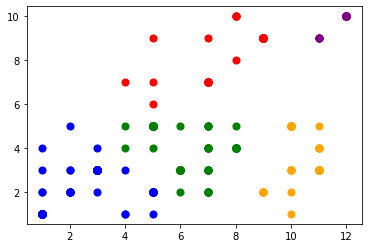

In [ ]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

In [ ]:
score = silhouette_score(X, labels, metric='euclidean')

In [ ]:
# Mencari Metode Linkage terbaik
score=[]
linkages = ['complete', 'single', 'average']
for linkage in linkages:
  model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage=linkage)
  model.fit(X)
  labels = model.labels_
  score.append(silhouette_score(X, labels, metric='euclidean'))

print(score)
print("Nilai Silhouette Score Terbaik : ", max(score), "\nMenggunakan Metode = ", linkages[score.index(max(score))])

[0.5414118292721793, 0.4776069351854534, 0.5633314636426858]
Nilai Silhouette Score Terbaik :  0.5633314636426858 
Menggunakan Metode =  average


In [ ]:
# Mencari Jumlah Cluster terbaik
score=[]
for i in range(2, 7):
  model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete')
  model.fit(X)
  labels = model.labels_
  score.append(silhouette_score(X, labels, metric='euclidean'))

print(score)
print("Nilai Silhouette Score Terbaik : ", max(score), "\nKetika Cluster = ", score.index(max(score))+2)

[0.45756757174923346, 0.4904574515713364, 0.4997312410437628, 0.5414118292721793, 0.5157540170170046]
Nilai Silhouette Score Terbaik :  0.5414118292721793 
Ketika Cluster =  5
